# Part I - Prosper Loan Data Exploration
## by Ben Pacheco

## Introduction
> 	This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
prosperloans = pd.read_csv('prosperLoanData.csv')

In [3]:
# high-level overview of data shape and composition
print(prosperloans.shape)

(113937, 81)


In [4]:
#variables of interest
prosperloans['ProsperRating'] = prosperloans['ProsperRating (Alpha)']
cols = ['LoanOriginalAmount', 'LoanStatus', 'StatedMonthlyIncome', 'BorrowerRate', 'DebtToIncomeRatio', 'Term',
       'CreditGrade', 'ProsperRating', 'BorrowerAPR', 'CreditScoreRangeLower', 'CreditScoreRangeUpper']
prosperloans = prosperloans[cols]

In [5]:
prosperloans.dtypes

LoanOriginalAmount         int64
LoanStatus                object
StatedMonthlyIncome      float64
BorrowerRate             float64
DebtToIncomeRatio        float64
Term                       int64
CreditGrade               object
ProsperRating             object
BorrowerAPR              float64
CreditScoreRangeLower    float64
CreditScoreRangeUpper    float64
dtype: object

In [6]:
prosperloans.head()

,LoanOriginalAmount,LoanStatus,StatedMonthlyIncome,BorrowerRate,DebtToIncomeRatio,Term,CreditGrade,ProsperRating,BorrowerAPR,CreditScoreRangeLower,CreditScoreRangeUpper
0,9425,Completed,3083.333333,0.1580,0.17,36,C,NaN,0.16516,640.0,659.0
1,10000,Current,6125.000000,0.0920,0.18,36,NaN,A,0.12016,680.0,699.0
2,3001,Completed,2083.333333,0.2750,0.06,36,HR,NaN,0.28269,480.0,499.0
3,10000,Current,2875.000000,0.0974,0.15,36,NaN,A,0.12528,800.0,819.0
4,15000,Current,9583.333333,0.2085,0.26,36,NaN,D,0.24614,680.0,699.0


In [7]:
# descriptive statistics for numeric variables
prosperloans.describe()

,LoanOriginalAmount,StatedMonthlyIncome,BorrowerRate,DebtToIncomeRatio,Term,BorrowerAPR,CreditScoreRangeLower,CreditScoreRangeUpper
count,113937.00000,1.139370e+05,113937.000000,105383.000000,113937.000000,113912.000000,113346.000000,113346.000000
mean,8337.01385,5.608026e+03,0.192764,0.275947,40.830248,0.218828,685.567731,704.567731
std,6245.80058,7.478497e+03,0.074818,0.551759,10.436212,0.080364,66.458275,66.458275
min,1000.00000,0.000000e+00,0.000000,0.000000,12.000000,0.006530,0.000000,19.000000
25%,4000.00000,3.200333e+03,0.134000,0.140000,36.000000,0.156290,660.000000,679.000000
50%,6500.00000,4.666667e+03,0.184000,0.220000,36.000000,0.209760,680.000000,699.000000
75%,12000.00000,6.825000e+03,0.250000,0.320000,36.000000,0.283810,720.000000,739.000000
max,35000.00000,1.750003e+06,0.497500,10.010000,60.000000,0.512290,880.000000,899.000000


### What is the structure of your dataset?

> Dataset consists of 81 columns (fields) and 113937 rows. Of the 81 fields, 61 are numeric. Some fields have missing values due to parameters existing or not existing before/after certain dates for example Prosper Rating is only applicable to loans issued after July 2009.

### What is/are the main feature(s) of interest in your dataset?

> I'm mostly interested in figuring out what features are best for predicting how much of a loan does a borrower recieve.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The following features will help me investigate about my main feature of interest: loan amounts.

> 1. loan amount (LoanOriginalAmount)
2. current loan status (LoanStatus)
3. borrower income (StatedMonthlyIncome)
4. borrower rate (BorrowerRate)
5. DebtToIncomeRatio
6. Term
7. CreditGrade/ProsperRating (Alpha)
8. BorrowerAPR
9. CreditScoreRangeLower
10. CreditScoreRangeUpper

## Univariate Exploration

Lets look at the distribution of the main feature of interest: loan amounts.

In [8]:
#function for adding space before capitalized letters

def splitString(string):
    return ''.join([x if x.islower() else f" {x}" for x in string])
#function for repeated histograms

def myHistPlot(df, xVar, interval, limit=1, figsize=[14,6]):
    
    # setting intervals for bins
    bins = np.arange(df[xVar].min(), df[xVar].quantile(limit)+interval, interval)
    #plot
    df[xVar].hist(bins = bins, grid = False, edgecolor = 'black', figsize = figsize);
    #labeling
    xVar = splitString(xVar)
    #title
    plt.title(f'Distribution of {xVar}{" - Data Excluded: "} {(1-limit):.0%}'.title(), fontsize = 14, weight = 'bold')
    #x label
    plt.xlabel(xVar.title(), fontsize = 10, weight = 'bold')
    #y label
    plt.ylabel('Frequency'.title(), fontsize = 10, weight = 'bold')
    
#function for repeated bar plots

def myCountPlot(df, yVar, color = sb.color_palette()[0]):
    #plot
    sb.countplot(data = df, y = yVar, color = color)
    #labeling
    yVar = splitString(yVar)
    #x label
    plt.ylabel(yVar.title(), fontsize = 10, weight = 'bold')
    #y label
    plt.xlabel('Frequency'.title(), fontsize = 10, weight = 'bold')

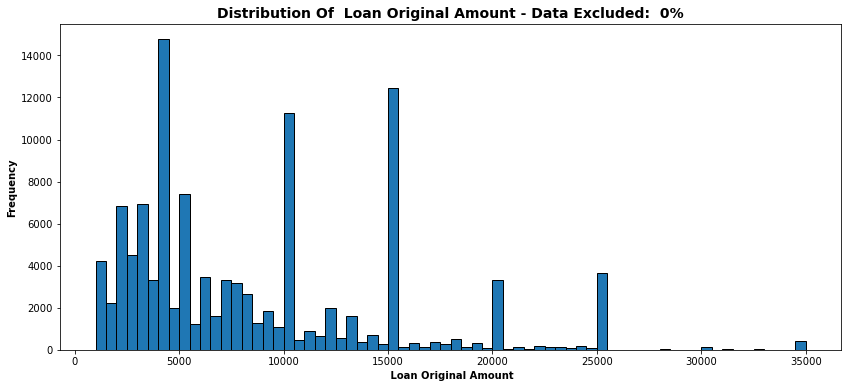

In [9]:
myHistPlot(prosperloans, 'LoanOriginalAmount', 500)

We clearly see peaks for the number of loans when loan amount is 5,000 to 15,000. Prosper Loan prefers to lend an amount divisible by 5K.

Let's do a log transform on the x-axis for curiosity's sake.

After a log transformation our distribution looks to be more multimodal. The same peaks that were mentioned are yet again observed. A transformation was indeed not necessary here.

Now let's look to see what kind of loans we are dealing with, my suspicion is: personal loans.

In [10]:
prosperloans.Term.describe()

count    113937.000000
mean         40.830248
std          10.436212
min          12.000000
25%          36.000000
50%          36.000000
75%          36.000000
max          60.000000
Name: Term, dtype: float64

Term is denoted by months therefore our min is 1 year and max is 5 years. Indeed we are dealing with personal loans here.

Let's plot Term to get more insight.

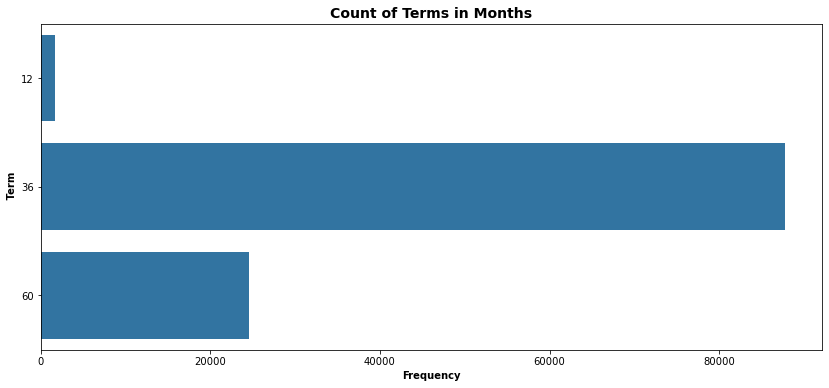

In [11]:
plt.figure(figsize = [14, 6])
myCountPlot(prosperloans, 'Term')
plt.title('Count of Terms in Months', fontsize = 14, weight = 'bold');

The majority of loans last 36 months or approximately 3 years, with 5 years leading behind, and 1 year at a minimum.

Let's look at another interesting predictor variable: BorrowerAPR

In [12]:
prosperloans.BorrowerAPR.describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

In [13]:
#Original dataset contains 113937 rows, therefore we need to remove any NaN values.

prosperAPR = prosperloans[prosperloans['BorrowerAPR'].notna()]

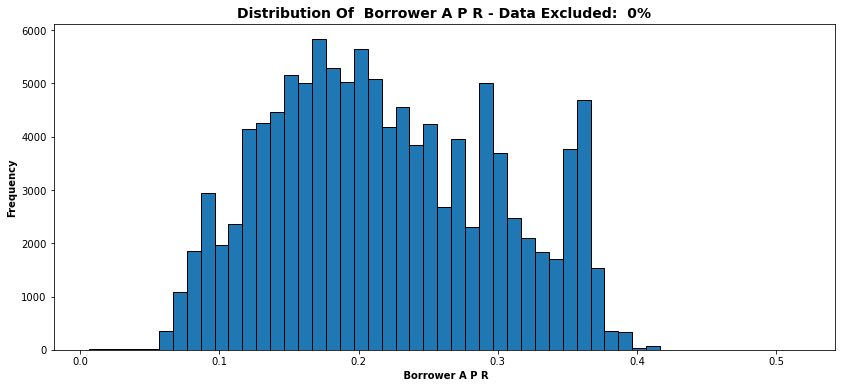

In [14]:
myHistPlot(prosperAPR, 'BorrowerAPR', 0.01)

We have a multimodal distributed histogram of the annual percentage rates for our loan data. We see a spike of 0.17 APR for number of loans.

Let's take a look at another interesting variable: Loan Status

In [15]:
prosperloans['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

It seems we have multiple row values for Past Due, let's concatenate these into one called 'Past Due'

In [16]:
prosperloans['LoanStatus'] = prosperloans['LoanStatus'].str.replace(r"\((.*?)\)", '', regex=True)

We'll also need to convert this to an ordered categorical variable.

In [17]:
#converting to ordered categorical variable
ordinal_var_dict = {'LoanStatus': ['Cancelled','FinalPaymentInProgress','Past Due','Defaulted','Chargedoff',
                                   'Completed', 'Current']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    prosperloans[var] = prosperloans[var].astype(ordered_var)

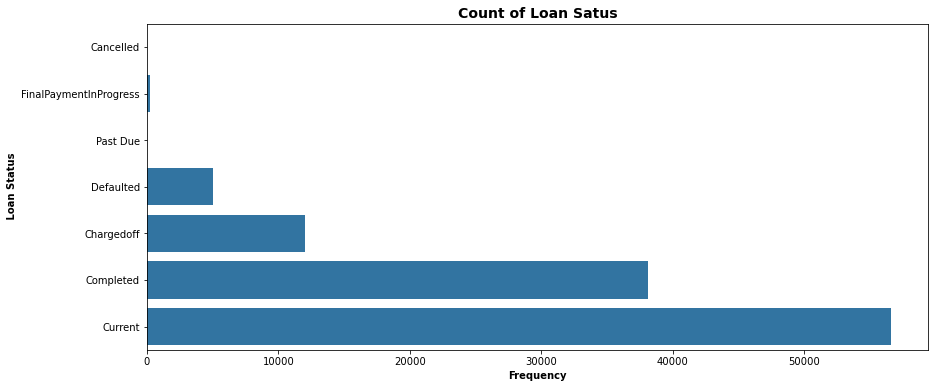

In [18]:
plt.figure(figsize = [14, 6])
myCountPlot(prosperloans, 'LoanStatus')
plt.title('Count of Loan Satus', fontsize = 14, weight = 'bold');

Most loans are either Current or Completed which means the loanee is in good standing with Prosper.

On another note we have a low amount of loans that have been either Chargedoff, Defaulted, or Past Due a certain amount of time.

Another question we might ponder on is whether monthly income affects the amount of loan you get.

We will check StatedMonthlyIncome's distribution to see what we are working with.

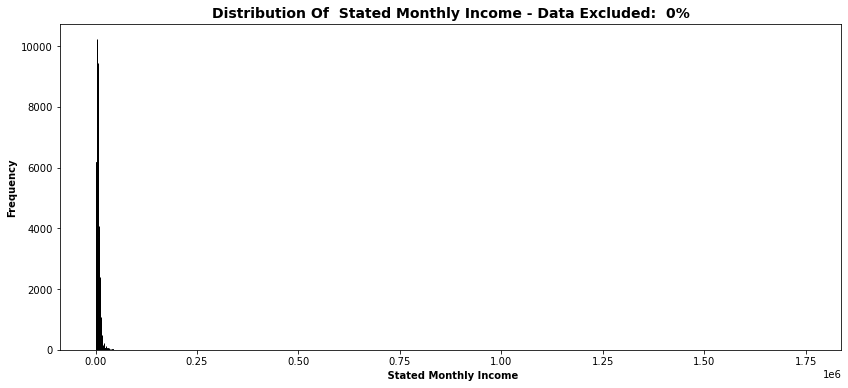

In [19]:
myHistPlot(prosperloans, 'StatedMonthlyIncome', 500)

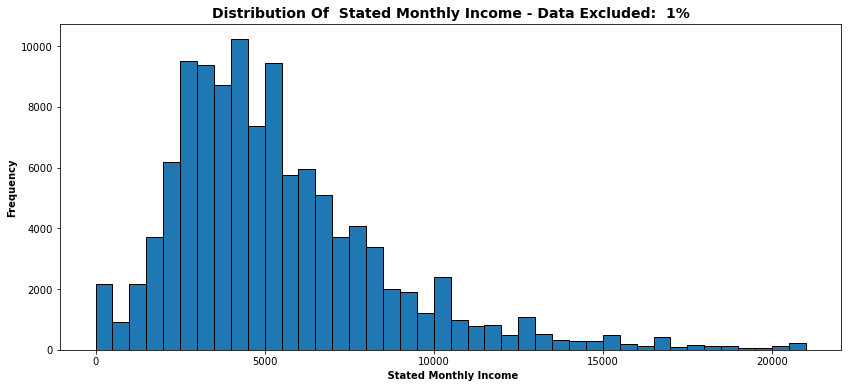

In [20]:
#due to outliers we need to exclude it
myHistPlot(prosperloans, 'StatedMonthlyIncome', 500, limit=0.99)

In [21]:
np.log10(prosperloans.StatedMonthlyIncome.describe())

C:\Users\Admin\anaconda3\envs\Udacity\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5.056665
mean     3.748810
std      3.873814
min          -inf
25%      3.505195
50%      3.669007
75%      3.834103
max      6.243039
Name: StatedMonthlyIncome, dtype: float64

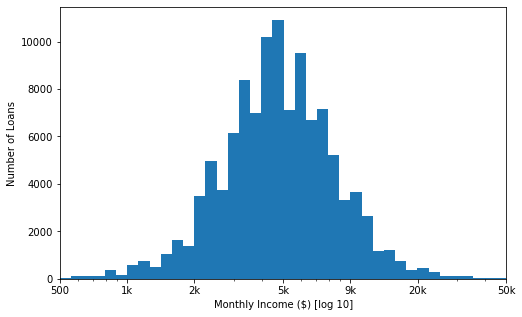

In [22]:
#trying log scale due to the right-skew and tail

plt.figure(figsize=[8, 5])
bins = 10 ** np.arange(0, np.log10(prosperloans.StatedMonthlyIncome.quantile(1))+0.05, 0.05)
plt.hist(data = prosperloans, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([500, 1000, 2000, 5000, 10000, 20000, 50000], ['500', '1k', '2k', '5k', '9k', '20k', '50k'])
plt.xlabel('Monthly Income ($) [log 10]')
plt.ylabel('Number of Loans')
plt.xlim(500, 50000);

Our distribution looks more unimodal now with a peak for 5k (log 10) in monthly income.

For our original plot we had a right-skew and long tail, which means the less amount of monthly income people had the more likely it is that they go for a loan. After a log transformation on the x-axis we obtained a unimodal distribution, what we can learn from this transformation is that on the lower end of monthly incomes they recieved little to no loans, with a monthly income of 5k being the deciding factor wether these people got a loan. We then see a steep decrease as we reach into 20k monthly income range, these people either make too much money to need a loan or Prosper sees no benefit in lending them money.

How much interest is Prosper applying to customers loans?

Let's take a look at Borrower Rates to get more insight on that.

In [23]:
prosperloans.BorrowerRate.describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

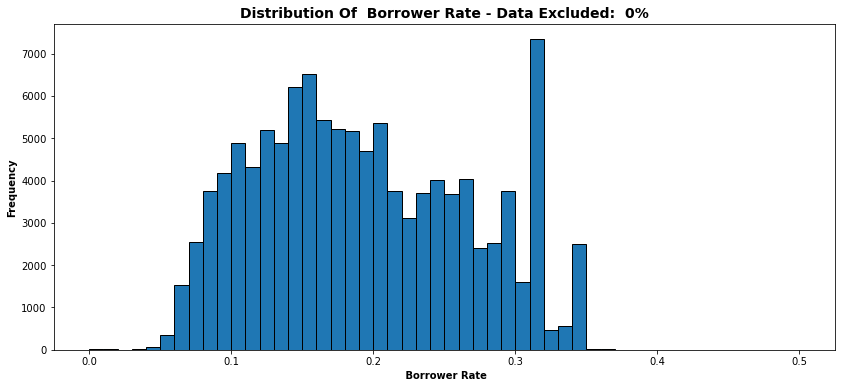

In [24]:
myHistPlot(prosperloans, 'BorrowerRate', 0.01)

It appears from the clearly unimodal distribution that Prosper favors ~0.32% interest rate.

Let's examine another feature of interest: Debt to Income Ratio.

In [25]:
#DebtToIncomeRatio
prosperloans.DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

In [26]:
sum(prosperloans.DebtToIncomeRatio.isna())

8554

In [27]:
#Original dataset contains 113937 rows, therefore we need to remove any NaN values.

prosperDTR = prosperloans[prosperloans['DebtToIncomeRatio'].notna()]

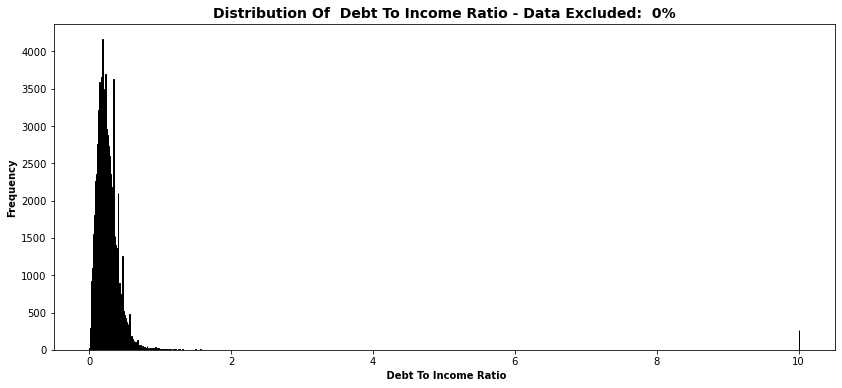

In [28]:
myHistPlot(prosperDTR, 'DebtToIncomeRatio', 0.01)

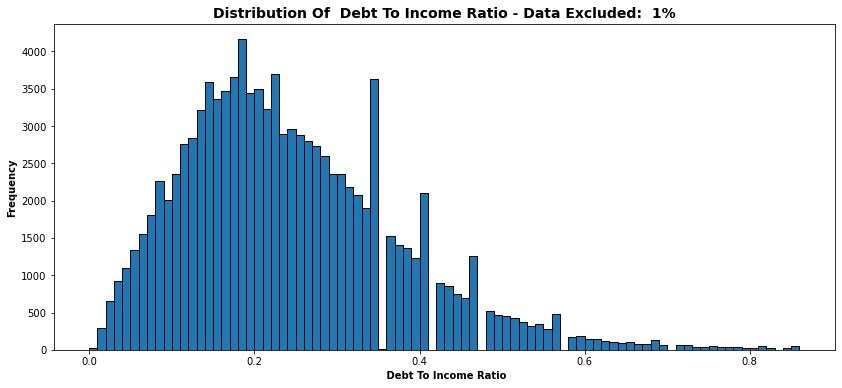

In [29]:
#exclude the outlier
myHistPlot(prosperDTR, 'DebtToIncomeRatio', 0.01, limit=0.99)

We have a right-skewed distribution here with a long tail, a couple of gaps in our x-axis indicating that we are missing valuable data for a number of loans. Observing the distribution we see a peak of 0.21 of Debt to Income ratio. 

And now we will observe our last categorical variables for our univariate exploration: Credit Grade and Prosper Rating.

We must be aware that Credit Grade is only filled for listings before 2009, and Prosper Rating for any loan listed after 2009.

What kind of credit grade or rating did prosper assign to its customers? What factors determine a good credit grade or rating?

In [30]:
prosperloans.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [31]:
prosperloans['ProsperRating'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating, dtype: int64

We'll need to convert this to an ordered categorical variable.

In [32]:
#converting to ordered categorical variable
ordinal_var_dict = {'CreditGrade': ['NC','HR','E','D', 'C', 'B', 'A', 'AA'],
                   'ProsperRating': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    prosperloans[var] = prosperloans[var].astype(ordered_var)

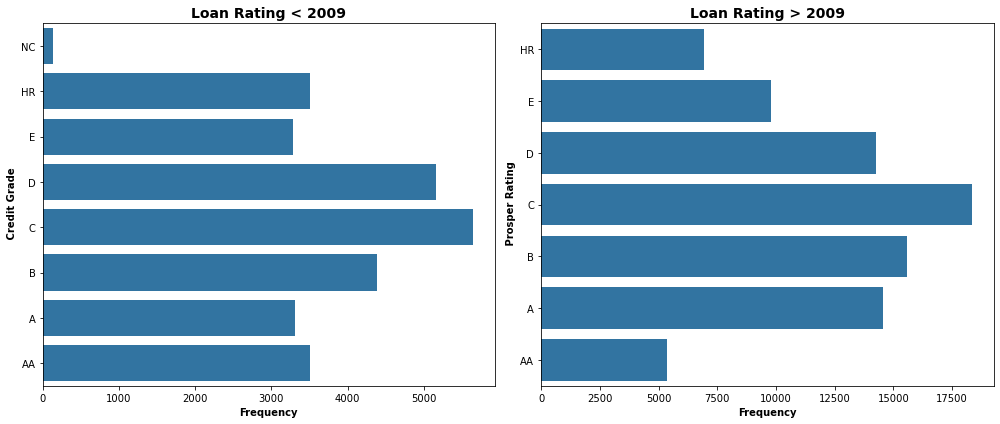

In [33]:
plt.figure(figsize = [14, 6])
plt.subplot(1, 2, 1)
myCountPlot(prosperloans, 'CreditGrade')
plt.title('Loan Rating < 2009', fontsize = 14, weight = 'bold')

plt.subplot(1, 2, 2)
myCountPlot(prosperloans, 'ProsperRating')
plt.title('Loan Rating > 2009', fontsize = 14, weight = 'bold')
plt.tight_layout();

For loan ratings before 2009 it seems as if Prosper usually either assigns a credit grade of C or D to its customers that obtain a loan. I wonder if theres a trend going on here; does prosper prefer to give a loan to people with bad credit in hopes of more profit? Prosper does not hand out much loans for customers with no credit which makes sense for a credit loaning company.

For loan ratings after 2009 the same can be said for the new prosper ratings, a rating of C is given more frequently, although it seems as if ratings have improved over the years since after C rating B leads second for most frequently which is an improvement from loans before 2009, also more customers earned a rating of A rather than D after 2009.

Having an idea of what the assigned ratings Prosper hands out we need to dig deeper and see what the actual credit scores from a credit agency look like for the loanees.

We'll plot both ranges of credit score to compare them.

In [34]:
prosperloans.CreditScoreRangeLower.describe()

count    113346.000000
mean        685.567731
std          66.458275
min           0.000000
25%         660.000000
50%         680.000000
75%         720.000000
max         880.000000
Name: CreditScoreRangeLower, dtype: float64

In [35]:
prosperloans.CreditScoreRangeUpper.describe()

count    113346.000000
mean        704.567731
std          66.458275
min          19.000000
25%         679.000000
50%         699.000000
75%         739.000000
max         899.000000
Name: CreditScoreRangeUpper, dtype: float64

In [36]:
#filtering out NaN values
prosperCSR = prosperloans[prosperloans['CreditScoreRangeLower'].notna() & prosperloans['CreditScoreRangeUpper'].notna()]

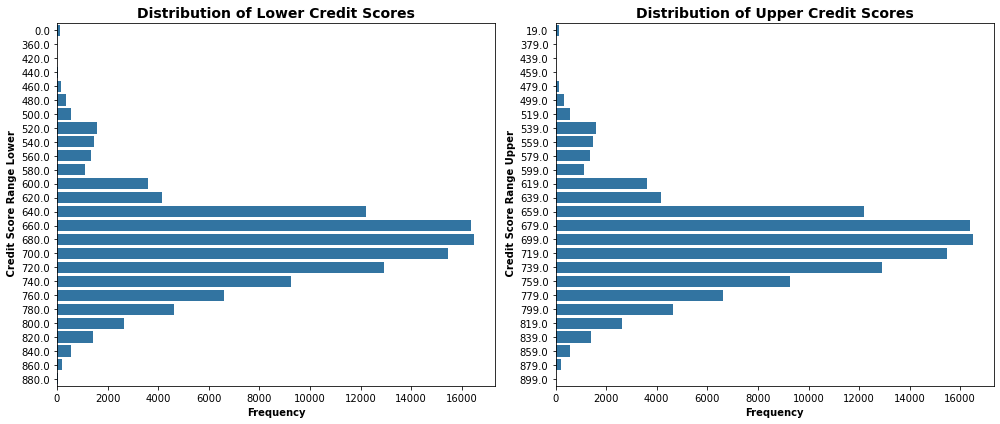

In [37]:
plt.figure(figsize = [14, 6])
plt.subplot(1, 2, 1)
myCountPlot(prosperCSR, 'CreditScoreRangeLower')
plt.title('Distribution of Lower Credit Scores', fontsize = 14, weight = 'bold')


plt.subplot(1, 2, 2)
myCountPlot(prosperCSR, 'CreditScoreRangeUpper')
plt.title('Distribution of Upper Credit Scores', fontsize = 14, weight = 'bold')
plt.tight_layout();

The distributions are closely normal with a slight left skew.

Prosper tends to give out more loans in the median ranges, about ~680 for both upper and lower ranges.

We can deduce that Prosper does not like handing out loans for very low credit scores reported by the credit agency, this could be due to a multitude of factors but my assumption is they simply don't trust those customers to pay off the loan.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

* We clearly see peaks for the number of loans when loan amount is 5,000 to 15,000. Prosper Loan prefers to lend an amount divisible by 5K.
* The majority of loans last 36 months or approximately 3 years, with 5 years leading behind, and 1 year at a minimum.
* We have a multimodal distributed histogram of the annual percentage rates for our loan data. We see a spike of 0.17 APR for number of loans.
* Most loans are either Current or Completed which means the loanee is in good standing with Prosper.
* For our original plot of monthly income we had a right-skew and short tail, which means the less amount of monthly income people had the more likely it is that they go for a loan. After a log transformation on the x-axis we obtained a unimodal distribution, what we can learn from this transformation is that on the lower end of monthly incomes they recieved little to no loans, with a monthly income of 5k being the deciding factor wether these people got a loan. We then see a steep decrease as we reach into 20k monthly income range, my assumption is that these people either make too much money to need a loan or Prosper sees no benefit in lending them money.
* Prosper prefers to lend at a ~0.32% interest rate
* We have a right-skewed distribution here with a long tail, a couple of gaps in our x-axis indicating that we are missing valuable data for a number of loans. Observing the distribution we see a peak of 0.21 of Debt to Income ratio. 
* For loan ratings before 2009 it seems as if Prosper usually either assigns a credit grade of C or D to its customers that obtain a loan. I wonder if theres a trend going on here; does prosper prefer to give a loan to people with bad credit in hopes of more profit? Prosper does not hand out much loans for customers with no credit which makes sense for a credit loaning company. For loan ratings after 2009 the same can be said for the new prosper ratings, a rating of C is given more frequently, although it seems as if ratings have improved over the years since after C rating B leads second for most frequently which is an improvement from loans before 2009, also more customers earned a rating of A rather than D after 2009.
* The distributions of CreditScoreRanges for upper and lower are closely normal with a slight left skew. Prosper tends to give out more loans in the median ranges, about ~680 for both upper and lower ranges. We can deduce that Prosper does not like handing out loans for very low credit scores reported by the credit agency, this could be due to a multitude of factors but my assumption is they simply don't trust those customers to pay off the loan.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distributions were as expected for the given data presented, no surprises there. I had to concatenate Past Due to avoid clutter since leaving them individually won't provide any avenue of insights. I ordered my categorical variables where deemed necessary. I did several log transformations to get a clearer picture of the distribution I was working with. When dealing with several variables I had to filter out NaN values to be able to plot the data. 

## Bivariate Exploration

Before I continue on with the plotting I want to preface the exploration by observing correlation coefficients.

In [59]:
#grouping variables based off numeric vs. category
numeric_vars = ['LoanOriginalAmount', 'StatedMonthlyIncome', 'BorrowerRate', 'DebtToIncomeRatio', 
                'BorrowerAPR', 'CreditScoreRangeLower', 'CreditScoreRangeUpper']
categoric_vars = ['Term', 'CreditGrade', 'ProsperRating', 'LoanStatus']

In [60]:
#remove NaN values again and store it into new dataframe

prosper_sub = prosperloans[prosperloans['BorrowerAPR'].notna() 
                           & prosperloans['CreditScoreRangeLower'].notna() 
                           & prosperloans['CreditScoreRangeUpper'].notna() 
                           & prosperloans['DebtToIncomeRatio'].notna()]

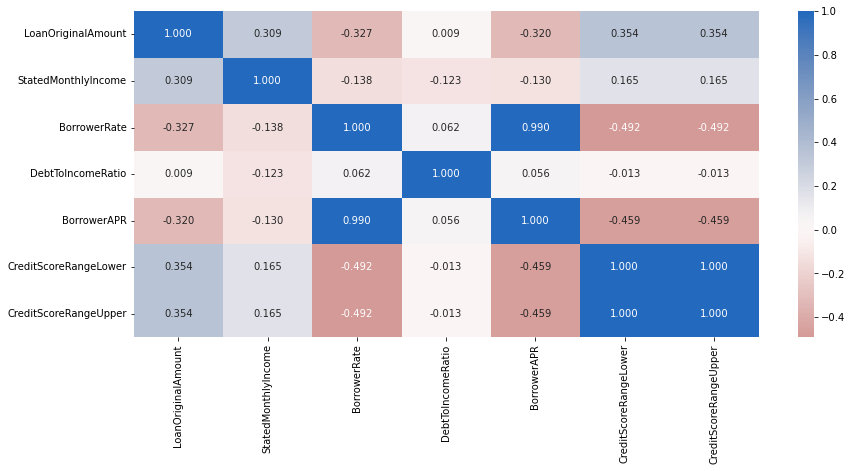

In [61]:
# correlation plot
plt.figure(figsize = [14, 6])
sb.heatmap(prosper_sub[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

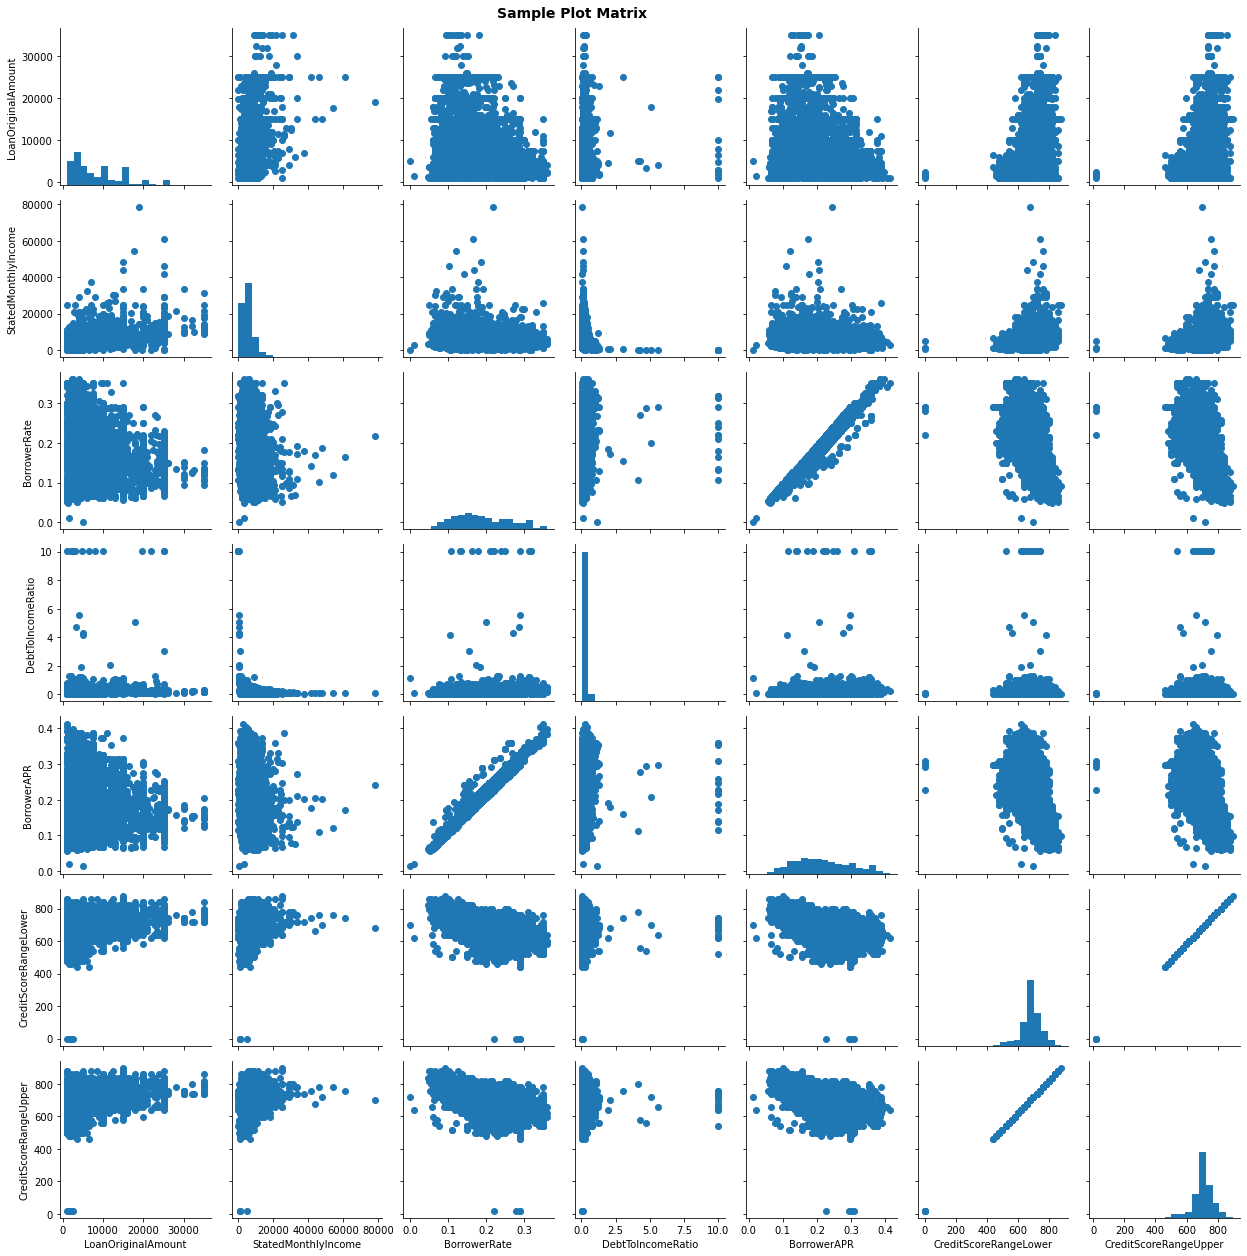

In [102]:
# plot matrix: sample 5000 loans so that plots are clearer and render faster
prosper_sub_samp = prosper_sub.sample(5000)
g = sb.PairGrid(data = prosper_sub_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter)
plt.suptitle('Sample Plot Matrix'.title(), x=0.45, y = 1, fontsize = 14, weight = 'bold');

There's alot of unpack here from both plots. Our correlation plots give us a few interesting observations.

* LoanOriginalAmount vs. CreditScoreRangeLower & Upper gives us a correlation of 0.354 thats a decent positive correlation that sits in the middle of the scale. The more loan amount a customer recieves from Prosper the more likely their credit score is higher. Which makes sense based off what we saw in our credit score plots. Although our scatterplot will need some cleaning to show this correlation.

* LoanOriginalAmount vs. StatedMonthlyIncome givues us a correlation of 0.309 which is another positive correlation that sits in the middle of the pack. I expected this number to be much higher than presented so we will definately dig in to an individual plot on this to check this relationship. The more loan amount a customer recieves from Prosper the more likely their income is higher. Based off the scatterplot this positive correlation is not obvious.

* LoanOriginalAmount vs. BorrowerAPR gives us a correlation of -0.320 which is a negative correlation. I expected to see this negative relationship between the two. The more loan amount a customer recieves from Prosper the less annual percentage rate is applied to that loan, therefore Prosper trusts these loanees more with favorable APR.

* LoanOriginalAmount vs. BorrowerRate gives us a correlation of -0.327 which is a negative correlation. Again similar to APR, the more loan amount a customer recieves the less interest rates that are attached to that loan. Prosper gives favorable rates to its high stakes customers.

* BorrowerRate vs. BorrowerAPR gives us a very positively correlation of 0.990. Our scatter plot shows a proper positive linear relationship between the two. This is a huge insight for our main variable of interest 'loan amounts'. The question that is kept in the back of my head will be: As the APR and interest rate increases does the loan amount decrease? This will be useful for our multivariate observations.


With these predictor variables in mind let's see how they correlate with our categorical variables.

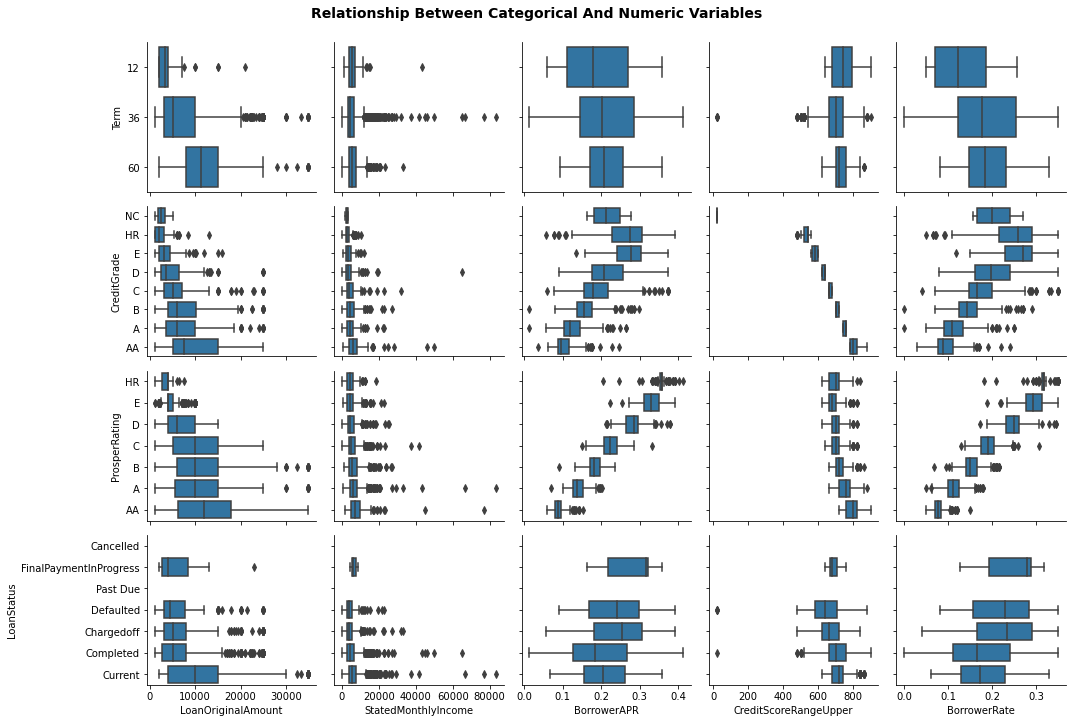

In [63]:
# we're using the sample from earlier
# since credit scores have a correlation of 1.0 i've decided to omit one of them for clarity

g = sb.PairGrid(data = prosper_sub_samp, x_vars = ['LoanOriginalAmount', 'StatedMonthlyIncome', 'BorrowerAPR',
                                                  'CreditScoreRangeUpper', 'BorrowerRate'],
                y_vars = categoric_vars)
g.map(sb.boxplot, color = sb.color_palette()[0], orient='h')
plt.suptitle('relationship between categorical and numeric variables'.title(), y = 1, fontsize = 14, weight = 'bold')
g.fig.set_size_inches(15, 10)
plt.tight_layout();

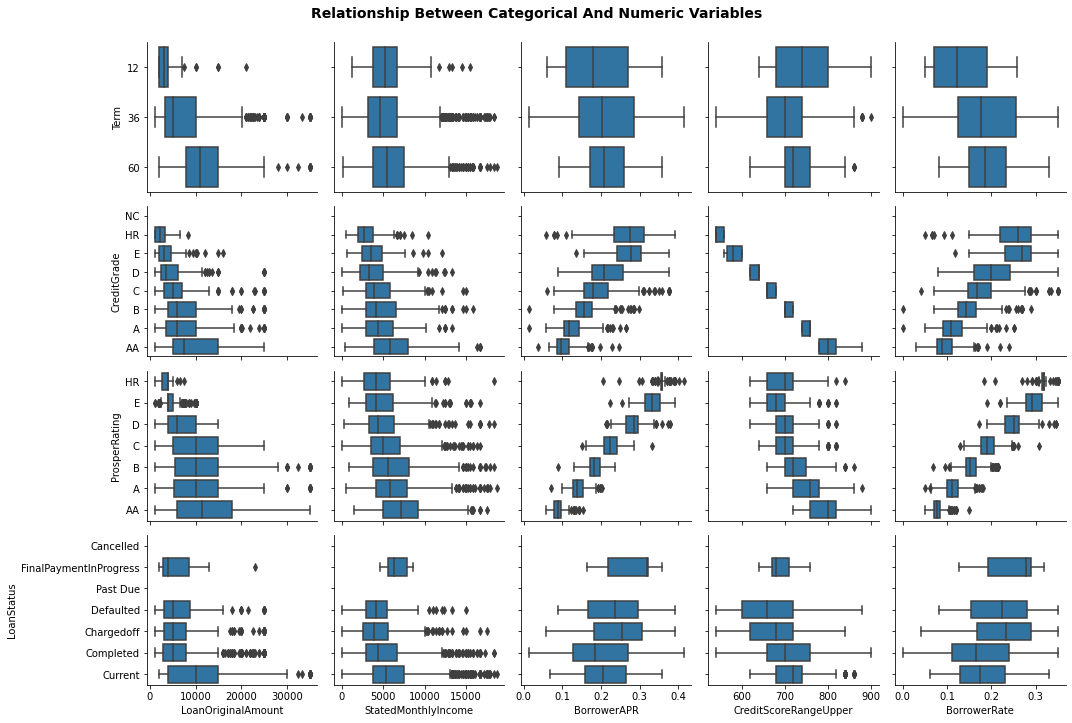

In [64]:
# excluding outliers (top 1% of monthly income and bottom 1% of credit score)
data = prosper_sub_samp.query('StatedMonthlyIncome<StatedMonthlyIncome.quantile(0.99) and CreditScoreRangeUpper>CreditScoreRangeUpper.quantile(0.01)').copy()

g = sb.PairGrid(data = data, x_vars = ['LoanOriginalAmount', 'StatedMonthlyIncome', 'BorrowerAPR',
                                                  'CreditScoreRangeUpper', 'BorrowerRate'],
                y_vars = categoric_vars)
g.map(sb.boxplot, color = sb.color_palette()[0], orient='h')
plt.suptitle('relationship between categorical and numeric variables'.title(), y = 1, fontsize = 14, weight = 'bold')
g.fig.set_size_inches(15, 10)
plt.tight_layout();

We see several positive and negative relationships here that are worth exploring more. 

Term: positive correlation with LoanOriginalAmount. Prosper tends to loan more amounts the longer the loan.

CreditGrade: positive correlation with CreditScoreRangeUpper, StatedMonthlyIncome, LoanOriginalAmount. Prosper assigns a higher Credit Grade usually when the customer has either a high Credit Score reported by the agency, a high monthly income, or when the customer is given a large loan amount. negative correlation with BorrowerRate, BorrowerAPR. Since APR and interest rate are highly likely 1:1 they share the same relationship with Credit Grades. Prosper tends to assign a lower Credit Grade the more APR or interest is involved in the loan. 

ProsperRating: positive correlation with CreditScoreRangeUpper, StatedMonthlyIncome, and LoanOriginalAmount. Prosper assigns a better rating usually when the customer has a higher credit score, a high monthly income, or when taking out a bigger loan. negative correlation with BorrowerAPR, BorrowerRate. Prosper tends to assign a lower rating the more APR or interest tacked onto the loan.

LoanStatus: hard to pinpoint any direct relationships but i'd propose that theres a slight negative correlation with BorrowerRate/APR and a slight positive correlation with CreditScoreRanges, StatedMonthlyIncome, LoanOriginalAmount. Prosper customers tend to default/chargedoff more the higher the rates are for the loan. Prosper customers also tend to complete or currently borrow from Prosper if they have a higher credit score, higher monthly income, or were given a larger loan amount.

We've done some initial exploring for numeric vs numeric, and categorical vs numeric. Now let's tackle what the categorical relationships look like.

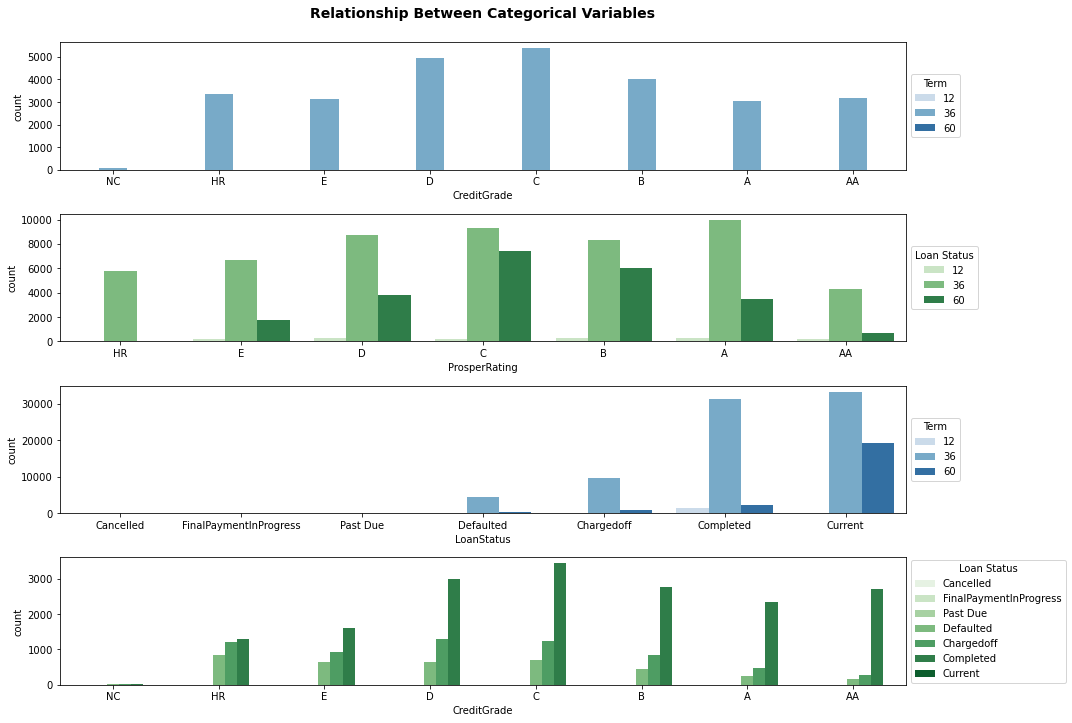

In [43]:
# plotting subplots for each categorical variable
plt.figure(figsize = [15, 10])

# subplot 1: credit grade vs. term
plt.subplot(4, 1, 1)
ax = sb.countplot(data = prosper_sub, x = 'CreditGrade', hue = 'Term', palette = 'Blues')
ax.legend(loc = 6, bbox_to_anchor = (1.0, 0.5), title='Term')

# subplot 2: credit grade vs. loan status
ax = plt.subplot(4, 1, 2)
sb.countplot(data = prosper_sub, x = 'ProsperRating', hue = 'Term', palette = 'Greens')
ax.legend(loc = 6, bbox_to_anchor = (1.0, 0.5), title='Loan Status') # re-arrange legend to remove overlapping

# subplot 3: loan status vs. term
ax = plt.subplot(4, 1, 3)
sb.countplot(data = prosper_sub, x = 'LoanStatus', hue = 'Term', palette = 'Blues')
ax.legend(loc = 6, bbox_to_anchor = (1.0, 0.5), title='Term') # re-arrange legend to reduce overlapping

# subplot 4: credit grade vs. loan status
ax = plt.subplot(4, 1, 4)
sb.countplot(data = prosper_sub, x = 'CreditGrade', hue = 'LoanStatus', palette = 'Greens')
ax.legend(loc = 6, bbox_to_anchor = (1.0, 0.5), title='Loan Status') # re-arrange legend to remove overlapping

plt.suptitle('relationship between categorical variables'.title(), x=0.45, y = 1, fontsize = 14, weight = 'bold')
plt.tight_layout()
plt.show();



CreditGrade vs. Term: there is not much interaction between these two variables, my assumption is that since CreditGrade was only populated for loans before 2009 that means that Prosper only gave out 3 year loans to their customers before 2009.

ProsperRating vs. Term: Prosper gave out 1 year and 5 year loans out after 2009 with 3 year loans being the most common still.

LoanStatus vs. Term: Prosper customers tend to complete their loans more if they were given a 3-year loan.

CreditGrade vs. LoanStatus: this plot is interesting to digest, prosper favors giving a credit grade of C if you have a current/completed loan. Prosper tends to give credit grades all around for having a loan or completing one. There is not direct relationship to decompress here but its important to note that even though a customer completes or owns a current loan Prosper will give them a credit grade based off other factors.

The initial exploration of our predictors has shown some valuable insight, let's dig deeper and explore individual relationships between loan amounts and several predictor variables.

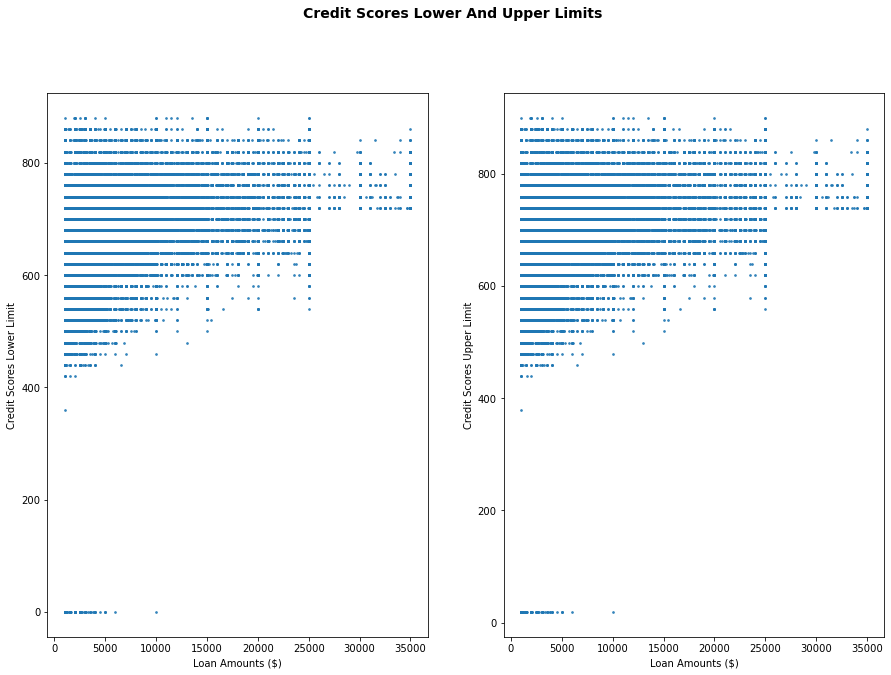

In [104]:
#plotting Loan amounts vs. Credit Score Ranges
plt.figure(figsize = [15, 10])
plt.subplot(1, 2, 1)
ax = sb.regplot(data = prosper_sub, x = 'LoanOriginalAmount', y = 'CreditScoreRangeLower', scatter_kws={'s':3}, 
                fit_reg=False, x_jitter=0.05)
plt.ylabel('Credit Scores Lower Limit')
plt.xlabel('Loan Amounts ($)')

plt.subplot(1, 2, 2)
ax = sb.regplot(data = prosper_sub, x = 'LoanOriginalAmount', y = 'CreditScoreRangeUpper', scatter_kws={'s':3},
                fit_reg=False, x_jitter=0.05)
plt.ylabel('Credit Scores Upper Limit')
plt.xlabel('Loan Amounts ($)')

plt.suptitle('Credit Scores Lower and Upper Limits'.title(), y = 1, fontsize = 14, weight = 'bold');

The higher the loan amount a customer recieves the higher the credit score is to be expected from Prosper. For the lowest of loan amounts customers that have credit score > 400 can obtain these amounts.

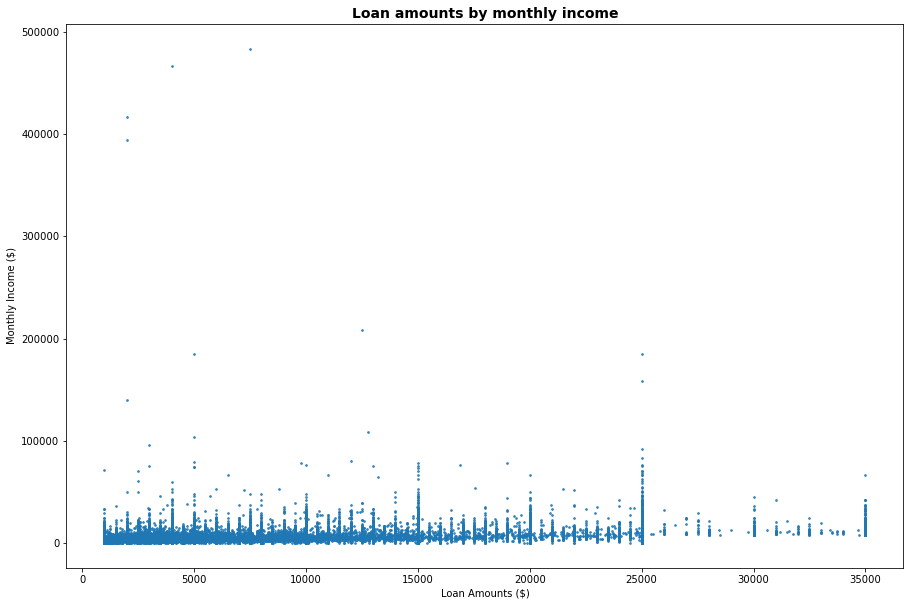

In [133]:
#loan amount vs. monthly income
plt.figure(figsize = [15, 10])

sb.regplot(data = prosper_sub, x = 'LoanOriginalAmount', y = 'StatedMonthlyIncome', scatter_kws={'s':3}, 
                fit_reg=False, x_jitter=0.05)
plt.ylabel('Monthly Income ($)')
plt.xlabel('Loan Amounts ($)')
plt.title('Loan amounts by monthly income', fontsize=14, weight='bold');

The positive correlation between the two is not obvious, moreso it looks to be constant on the y axis for alot of loan amounts given by Prosper. What we can conclude from this is

1. monthly income is not great as a predictor variable
2. Prosper is not bias towards people with higher monthly income, infact one can assume that if you have higher income you won't need a loan.

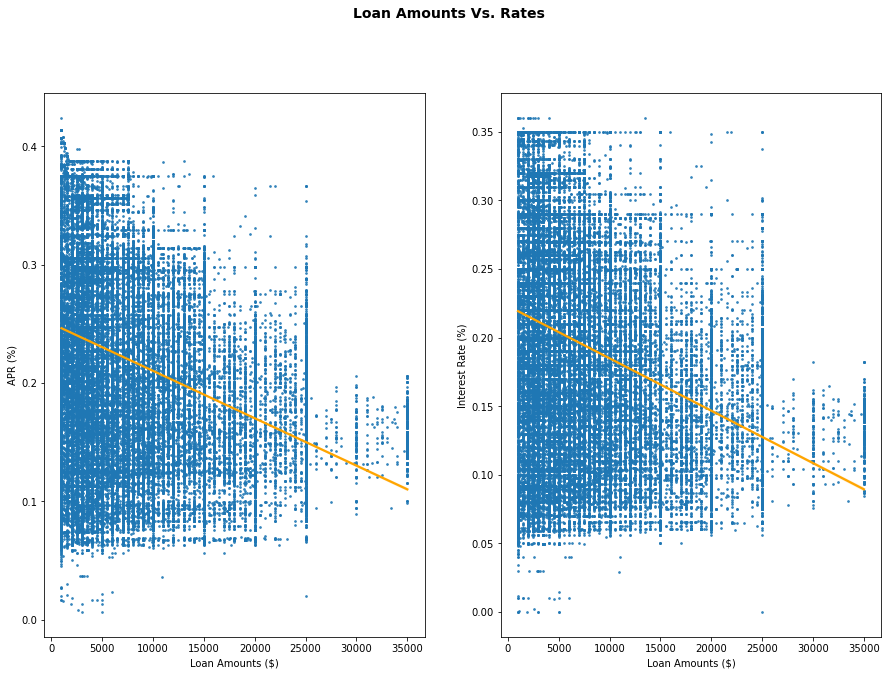

In [107]:
#loan amount vs. borrowerAPR and borrowerRate

plt.figure(figsize = [15, 10])
plt.subplot(1, 2, 1)
ax = sb.regplot(data = prosper_sub, x= 'LoanOriginalAmount', y= 'BorrowerAPR', scatter_kws={'s':3}, x_jitter=0.05,
               line_kws={'color':'orange'})
plt.ylabel('APR (%)')
plt.xlabel('Loan Amounts ($)')


plt.subplot(1, 2, 2)
ax = sb.regplot(data = prosper_sub, x= 'LoanOriginalAmount', y= 'BorrowerRate', scatter_kws={'s':3}, x_jitter=0.05,
               line_kws={'color':'orange'})

plt.ylabel('Interest Rate (%)')
plt.xlabel('Loan Amounts ($)')

plt.suptitle('Loan amounts vs. Rates'.title(), y = 1, fontsize = 14, weight = 'bold');


Since both percentage rates are closely 1:1 i've decided to plot them side by side to get an idea of how loan amount stacked against rates. 

It seems that as loan amounts increase the rate percentages go down which totally makes sense for a loan company. Prosper trusts the customer that obtain a higher amount of loan therefore they don't need to apply a high APR or interest rate onto the customer because they expect the customer to pay the loan back in full and on time.

Let's divert away from the main variable for a moment to explore how/why the rates are so closely related.

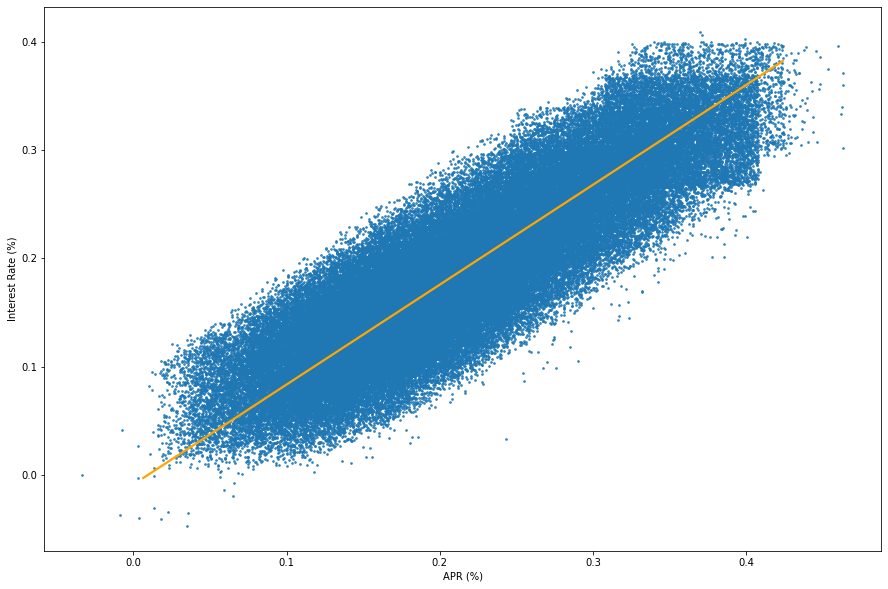

In [74]:
#BorrowerRate vs. BorrowerAPR
plt.figure(figsize = [15, 10])

sb.regplot(data = prosper_sub, y = 'BorrowerRate', x = 'BorrowerAPR', scatter_kws={'s':3}, x_jitter=0.05, y_jitter = 0.05,
          line_kws={'color':'orange'})
plt.xlabel('APR (%)')
plt.ylabel('Interest Rate (%)');

The obvious is clear, very strong correlation between the two.

Let's see how loan amounts stack against our categorical variables of interest.

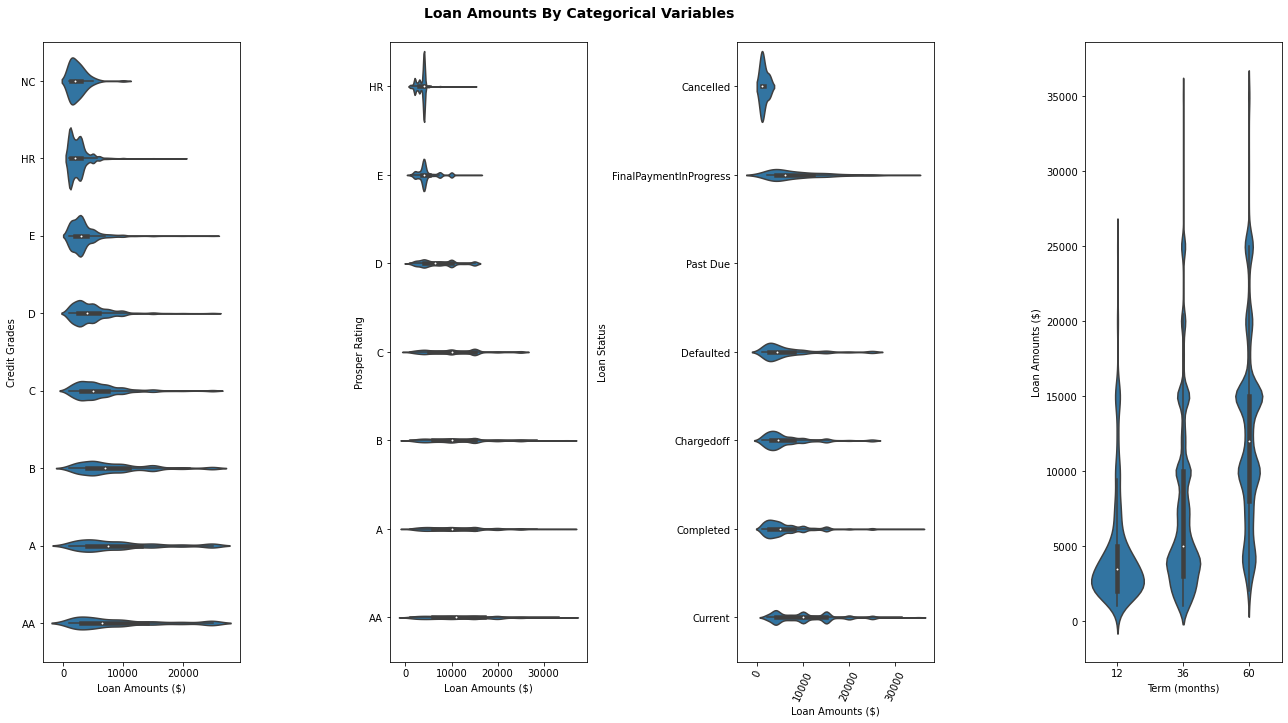

In [113]:
#loan amounts vs. credit grades, loan amounts vs. prosper rating, loan amounts vs. loan status, loan amounts vs. term

plt.figure(figsize = [18, 10])
base_color = sb.color_palette()[0]

plt.subplot(1, 4, 1)
sb.violinplot(data=prosper_sub, x='LoanOriginalAmount', y='CreditGrade', color=base_color, inner='box')
plt.ylabel('Credit Grades')
plt.xlabel('Loan Amounts ($)')

plt.subplot(1, 4, 2)
sb.violinplot(data=prosper_sub, x='LoanOriginalAmount', y='ProsperRating', color=base_color, inner='box')
plt.ylabel('Prosper Rating')
plt.xlabel('Loan Amounts ($)')

plt.subplot(1, 4, 3)
sb.violinplot(data=prosper_sub, x='LoanOriginalAmount', y='LoanStatus', color=base_color, inner='box')
plt.xticks(rotation=65)
plt.ylabel('Loan Status')
plt.xlabel('Loan Amounts ($)')

plt.subplot(1, 4, 4)
sb.violinplot(data=prosper_sub, y='LoanOriginalAmount', x='Term', color=base_color, inner='box')
plt.xlabel('Term (months)')
plt.ylabel('Loan Amounts ($)')
plt.suptitle('loan amounts by categorical variables'.title(), x=0.45, y = 1, fontsize = 14, weight = 'bold')
plt.tight_layout();

Higher credit grades are assigned to customers more often when they take out higher loan amounts. Prosper assigned more A and C rating post 2009 for higher loan amounts. Prosper lends more money the more years are attached to that loan. Customers are more likely to complete or currently own a loan from Prosper if they were given a high loan amount. We will explore more of these variables in the multivariate analysis.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I was disappointed in some of the predictor variables that I stacked against loan amounts. Precisely the credit score ranges and monthly income. You'd think and assume that credit and how much someone earns would be a great predictor in seeing how much a customer can borrow but the plots just don't show that much of a strong pairwise relationship between the two. Although I think it will be necessary to further explore loan amounts and the rates stacked against our categorical variables. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> As the preliminary observation showed the rates had 0.990 correlation between each other. I plotted this on a scatter plot and was not surprised to see a very strong pairwise relationship. The rates do not need to be further explored amongst each other but I think it will be interesting to incorporate them along with loan amounts and our categorical variables for multivariate analysis purposes.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In this section we will focus our attention on comparing the main variable 'loan amounts' and our rate variable BorrowerAPR/Rate with our categorical variables.

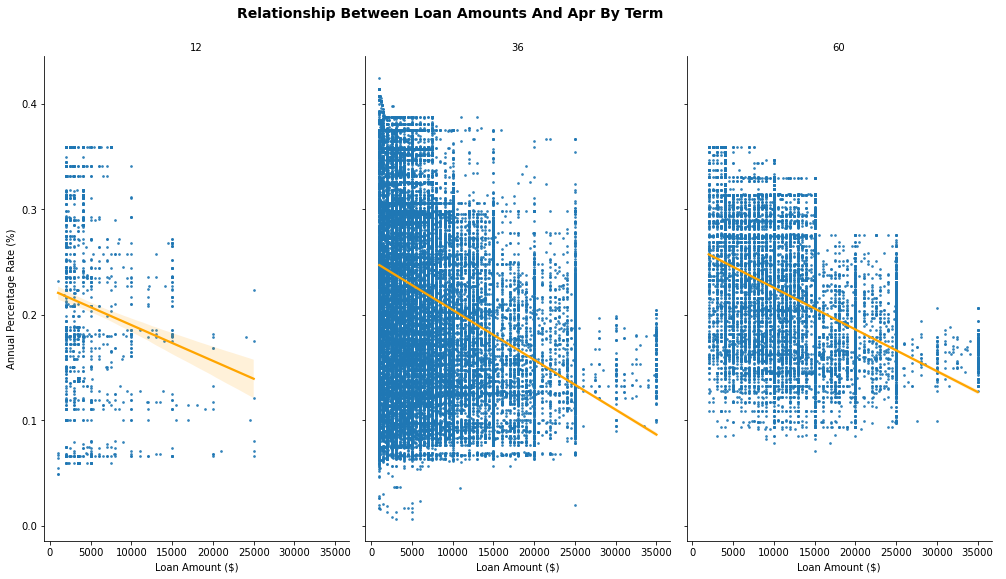

In [118]:
# loan amounts vs. BorrowerAPR with Term
g=sb.FacetGrid(data=prosper_sub, aspect=1, height=5, col='Term', col_wrap=3)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.05, scatter_kws={'s':3}, 
      line_kws={'color':'orange'});
g.add_legend()
g.set_xlabels('Loan Amount ($)')
g.set_ylabels('Annual Percentage Rate (%)')
g.set_titles('{col_name}')
plt.suptitle('Relationship between loan amounts and APR by term'.title(), x=0.45, y = 1, fontsize = 14, weight = 'bold')
g.fig.set_size_inches(14, 8)
plt.tight_layout();

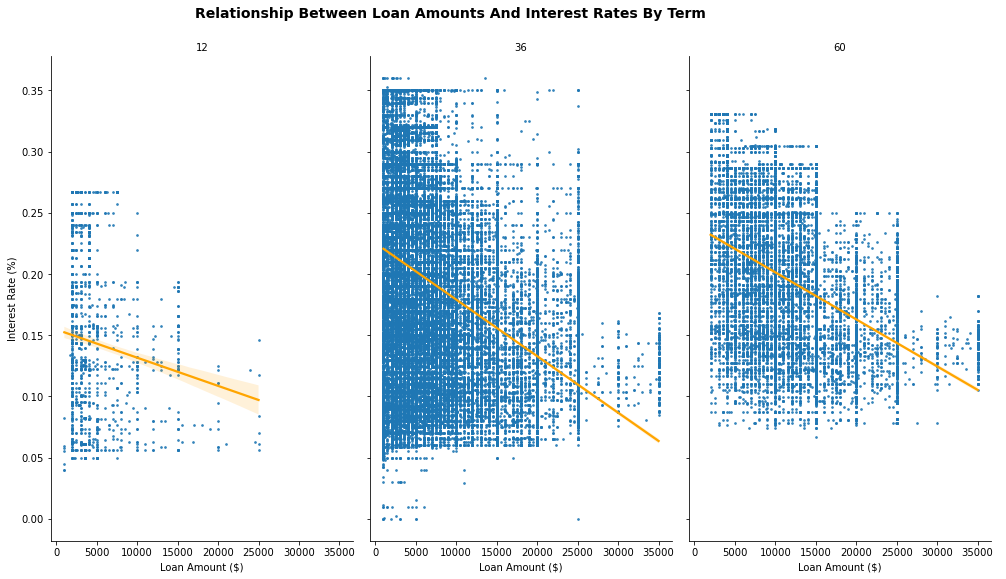

In [119]:
# loan amounts vs. BorrowerRate with Term
g=sb.FacetGrid(data=prosper_sub, aspect=1, height=5, col='Term', col_wrap=3)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerRate', x_jitter=0.05, scatter_kws={'s':3}, 
      line_kws={'color':'orange'});
g.add_legend()
g.set_xlabels('Loan Amount ($)')
g.set_ylabels('Interest Rate (%)')
g.set_titles('{col_name}')
plt.suptitle('Relationship between loan amounts and interest rates by term'.title(), x=0.45, y = 1, fontsize = 14, weight = 'bold')
g.fig.set_size_inches(14, 8)
plt.tight_layout();

As expected for term 36 months our plot is very populated. From observation though we can clearly see as the months go by the slope of the fitted regression line gets less steeper. What this tells us is that as loans increase in amounts the rates will decrease the longer the loan amount is assigned to that loan. So a loan that last the full 5 years will see the most decrease in rates the higher the loan amount.

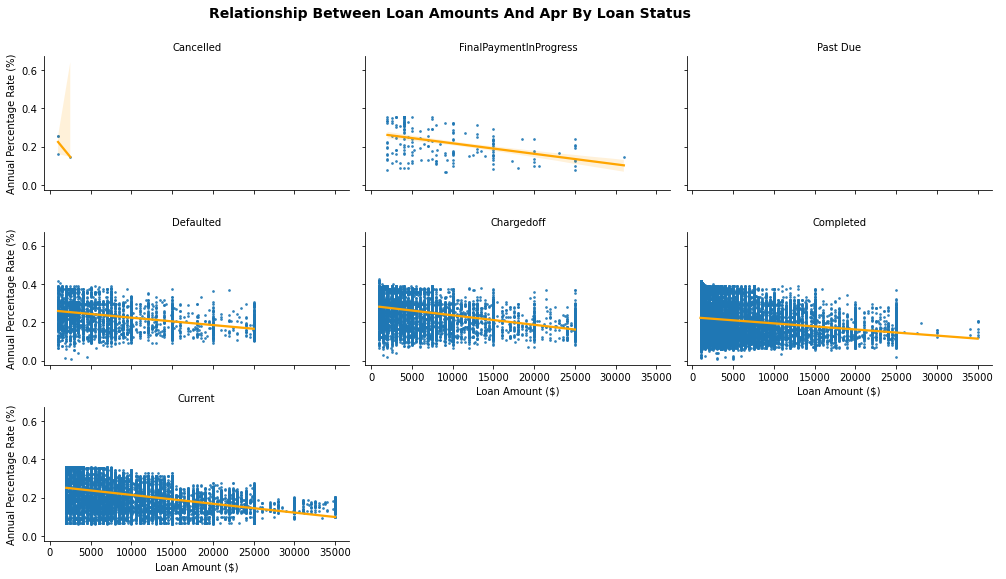

In [121]:
# loan amounts vs. BorrowerAPR and LoanStatus

g=sb.FacetGrid(data=prosper_sub, aspect=1, height=5, col='LoanStatus', col_wrap=3)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.05, scatter_kws={'s':3}, 
      line_kws={'color':'orange'});
g.add_legend()
g.set_xlabels('Loan Amount ($)')
g.set_ylabels('Annual Percentage Rate (%)')
g.set_titles('{col_name}')
plt.suptitle('Relationship between loan amounts and APR by Loan status'.title(), x=0.45, y = 1, fontsize = 14, weight = 'bold')
g.fig.set_size_inches(14, 8)
plt.tight_layout();

Negative slope when comparing these three variables. For each loan status as loan amounts increase the APR decreases in tandem.

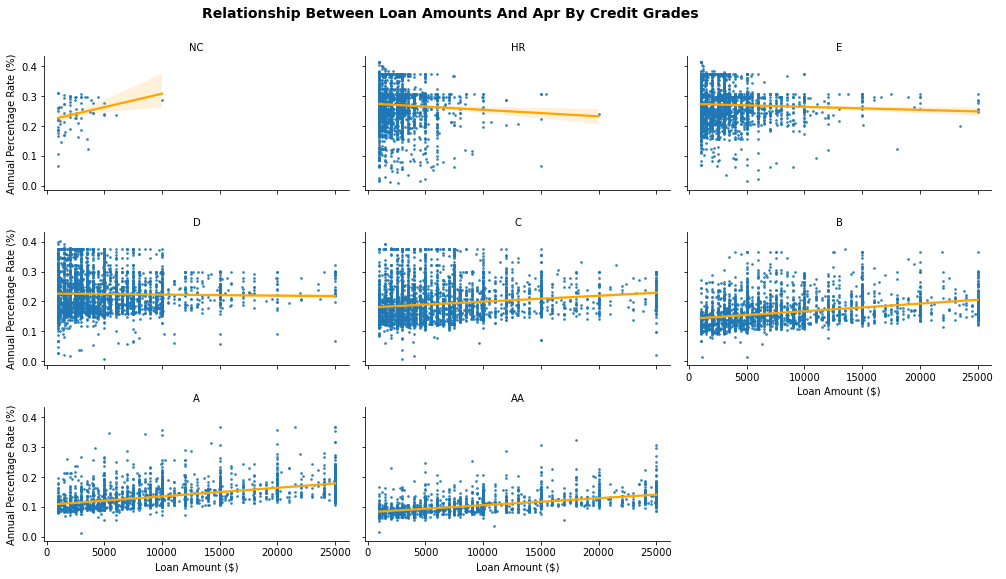

In [124]:
# loan amounts vs. BorrowerAPR with Credit Grades

g=sb.FacetGrid(data=prosper_sub, aspect=1, height=5, col='CreditGrade', col_wrap=3)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.05, scatter_kws={'s':3}, 
      line_kws={'color':'orange'});
g.add_legend()
g.set_xlabels('Loan Amount ($)')
g.set_ylabels('Annual Percentage Rate (%)')
g.set_titles('{col_name}')
plt.suptitle('Relationship between loan amounts and APR by Credit Grades'.title(), x=0.45, y = 1, fontsize = 14, weight = 'bold')
g.fig.set_size_inches(14, 8)
plt.tight_layout();

For Prosper customers before 2009 that have no credit we see an upward slope, loan amounts increase and so does the APR. For grades HR to D the slope is negative so for these grades assigned as loan amounts increase APR decreases. Looking closely at the next grades as they increase in succession we can see a trend, as Prosper assigned a higher grade to the customer the slope gets less steep therefore higher grade assigned means the loan amount and rates will go up. This is interesting to see because we saw earlier in bivariate plots that loan amounts and the rates had a negative correlation.

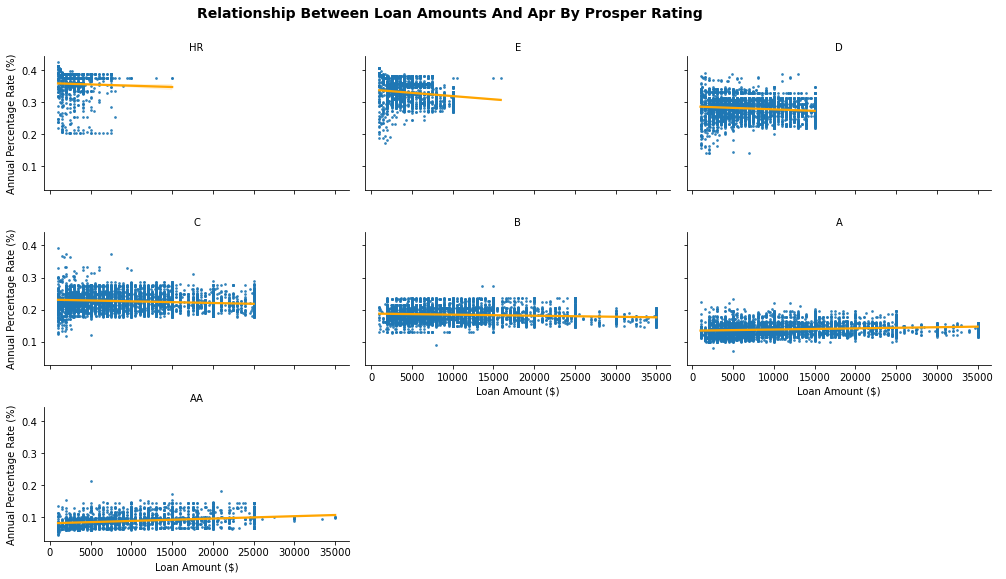

In [125]:
# loan amounts vs. BorrowerAPR with Prosper Rating

g=sb.FacetGrid(data=prosper_sub, aspect=1, height=5, col='ProsperRating', col_wrap=3)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.05, scatter_kws={'s':3}, 
      line_kws={'color':'orange'});
g.add_legend()
g.set_xlabels('Loan Amount ($)')
g.set_ylabels('Annual Percentage Rate (%)')
g.set_titles('{col_name}')
plt.suptitle('Relationship between loan amounts and APR by Prosper Rating'.title(), x=0.45, y = 1, fontsize = 14, weight = 'bold')
g.fig.set_size_inches(14, 8)
plt.tight_layout();

For Prosper customer post 2009 we see something interestingly different than Credit Grades. Ratings HR - B all have negative trends. Only ratings A - AA have positive trends.

We should try plotting what loan amounts vs. two categorical variables looks like.

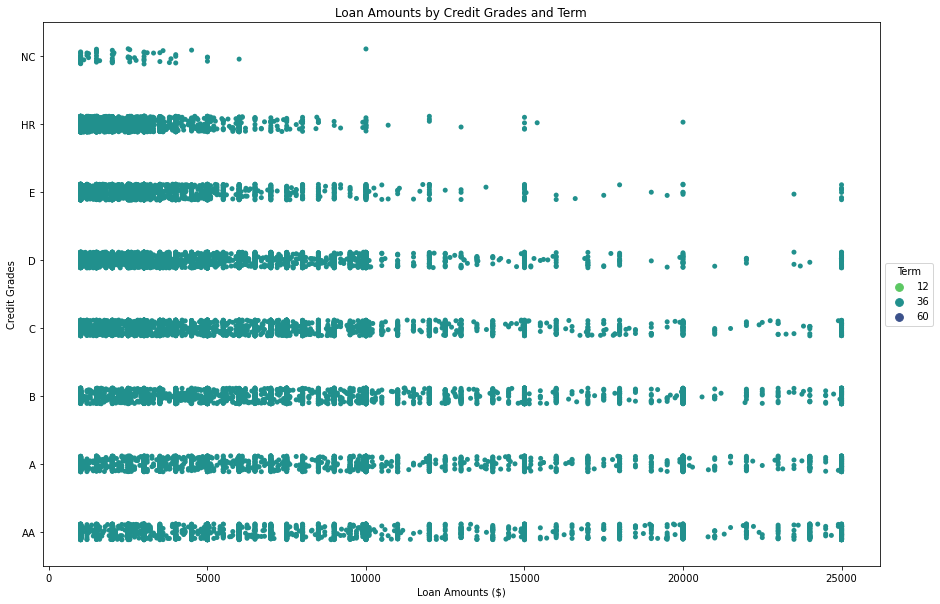

In [126]:
# loan amounts vs. credit grades and term
plt.figure(figsize=(15, 10))
ax = sb.stripplot(data=prosper_sub, y='CreditGrade', x= 'LoanOriginalAmount', hue='Term',
                  jitter = 0.35, dodge=0.4, palette= "viridis_r");
plt.xlabel('Loan Amounts ($)')
plt.ylabel('Credit Grades')
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5), title='Term')
plt.title('Loan Amounts by Credit Grades and Term');

Not much can be said here since it's only populated for term of 3 years. We need the post 2009 data so we will use prosper raitng instead.

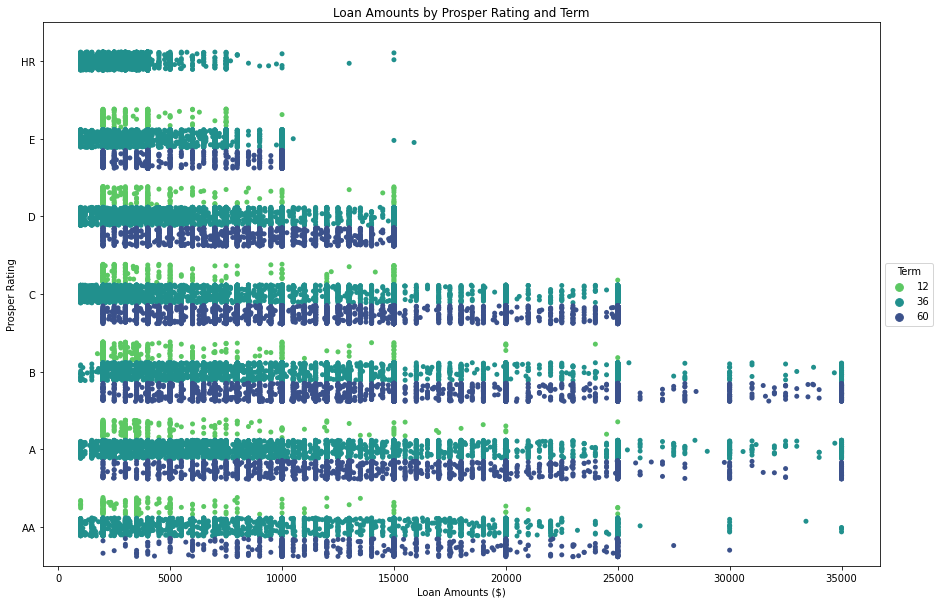

In [130]:
# loan amounts vs. prosper rating and term
plt.figure(figsize=(15, 10))
ax = sb.stripplot(data=prosper_sub, y='ProsperRating', x= 'LoanOriginalAmount', hue='Term',
                  jitter = 0.35, dodge=0.4, palette= "viridis_r");
plt.xlabel('Loan Amounts ($)')
plt.ylabel('Prosper Rating')
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5), title='Term')
plt.title('Loan Amounts by Prosper Rating and Term');

For loans given post 2009 we see that for each term as loan amounts increase so does the rating Prosper gives to its customers.

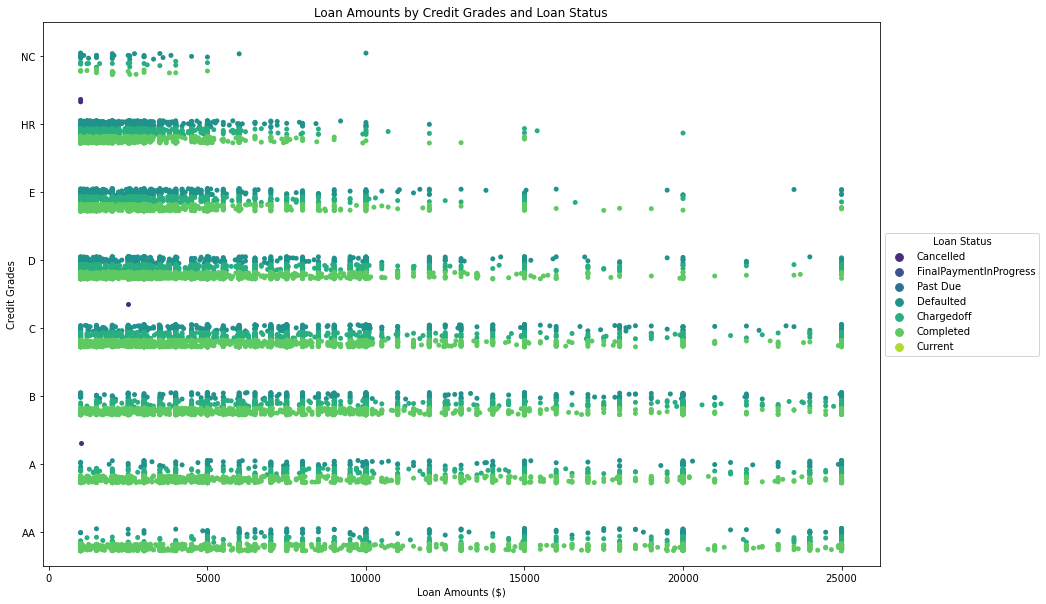

In [132]:
# loan amounts. vs credit grades and loanstatus
plt.figure(figsize=(15, 10))
ax = sb.stripplot(data=prosper_sub, y='CreditGrade', x= 'LoanOriginalAmount', hue='LoanStatus',
                  jitter=0.35, dodge=0.4, palette= "viridis");
plt.xlabel('Loan Amounts ($)')
plt.ylabel('Credit Grades')
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5), title='Loan Status')
plt.title('Loan Amounts by Credit Grades and Loan Status');

Interesting thing to point out here is that as loan amounts and credit grade increase we see that it is common for that loan to be past due - charged off which doesn't align with our earlier findings about loan status.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> When plotting loan amounts by the rates with term I observed that as the months went by the slope of the regression line decreased in steepness. So loans decrease in amounts then the rates will increase the longer the loan amount is assigned to the loan. For loan amounts vs. rates and credit I saw negative trends for grades E and D, and positive ones for any grade higher than that.

### Were there any interesting or surprising interactions between features?

> The main thing that caught my eye was observing loan amounts vs. APR and credit grades. Earlier for bivariate plots we saw a direct trend of loan amounts vs rates had negative correlation which makes sense. But in the multivariate analysis plotting credit grades along with that for grades > D we saw positive correlations. For the plot of loan amounts vs. credit grades and loan status we saw that most loans that were past due - charged off were assigned a higher credit grade which is an interesting observation that doesn't align with the bivariate findings.

## Conclusions

> To wrap things up I can conclude that in the end serveral of the variables I picked were not good at predicting how much of a loan does a borrower recieve. The rates of APR and interest were the closest predictor variable to determining a loan amount. As for categorical variables Credit Grade for loans before 2009, Prosper Rating for loans after 2009, and Term were good indicators of loan amounts.
